# Pandas Pivot and Unpivot<a name="_pandas pivot and unpivot"></a>

# Table of Contents
- [ Pandas Pivot and Unpivot](#_pandas pivot and unpivot) 
  - [ Making a Pivot Table from Tidy Long Data](#_making a pivot table from tidy long data) 
  - [ Fixing Hierarchical Columns](#_fixing hierarchical columns) 
  - [ Similarity to GroupBy](#_similarity to groupby) 
  - [ Unpivoting a Pivot table](#_unpivoting a pivot table) 
  - [ Nested Pivoting](#_nested pivoting) 


I strongly recommend this article: http://pbpython.com/pandas-pivot-table-explained.html

**A pivot table is a table that summarizes data in another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data. **

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
rain = pd.read_csv('data_week4/Paris_Rainfall_Unpivoted.csv')

In [6]:
rain.head(5)

,Year,Month,Value
0,1688,Jan,NaN
1,1688,Feb,NaN
2,1688,Mar,NaN
3,1688,Apr,NaN
4,1688,May,NaN


In [7]:
# rename value to make it more clear
rain = rain.rename(columns={"Value": "Rainfall"})

In [8]:
rain.head(12)

,Year,Month,Rainfall
0,1688,Jan,NaN
1,1688,Feb,NaN
2,1688,Mar,NaN
3,1688,Apr,NaN
4,1688,May,NaN
5,1688,Jun,75.0
6,1688,Jul,47.0
7,1688,Aug,9.0
8,1688,Sep,43.0
9,1688,Oct,46.0


## Making a Pivot Table from Tidy Long Data<a name="_making a pivot table from tidy long data"></a>

**A pivot table is a table that summarizes data in another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data. **

In Excel, you are thinking in terms of rows and columns.  In Pandas, **rows are the Index**.  The default aggregation method is the mean. In this case, we have only one value per month and year, so the mean is the same value.  The Columns are hierarchical -- Rainfall with Months under.

In [10]:
pivotedyear = pd.pivot_table(rain, index=['Year'], columns=['Month'],values=['Rainfall'])

In [11]:
pivotedyear.head()

Rainfall                                                               \
Month      Apr   Aug   Dec   Feb   Jan    Jul   Jun   Mar   May   Nov   Oct   
Year                                                                          
1688       NaN   9.0  49.0   NaN   NaN   47.0  75.0   NaN   NaN  44.0  46.0   
1689      37.0  41.0  18.0  22.0  36.0  116.0  20.0  22.0  18.0  66.0  50.0   
1690      24.0  79.0   9.0  32.0  70.0   73.0  63.0  43.0  68.0  23.0  64.0   
1691       NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   
1692       NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   

             
Month   Sep  
Year         
1688   43.0  
1689   45.0  
1690   21.0  
1691    NaN  
1692    NaN

## Fixing Hierarchical Columns<a name="_fixing hierarchical columns"></a>

In [12]:
# there are 2 levels here - with 2 different lists.
pivotedyear.columns

MultiIndex(levels=[['Rainfall'], ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           names=[None, 'Month'])

In [13]:
pivotedyear.columns = pivotedyear.columns.get_level_values(1)

In [14]:
pivotedyear.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1688,NaN,9.0,49.0,NaN,NaN,47.0,75.0,NaN,NaN,44.0,46.0,43.0
1689,37.0,41.0,18.0,22.0,36.0,116.0,20.0,22.0,18.0,66.0,50.0,45.0
1690,24.0,79.0,9.0,32.0,70.0,73.0,63.0,43.0,68.0,23.0,64.0,21.0
1691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# try this with and without values -- see the difference?
months = pd.pivot_table(data=rain, index="Month", values=["Rainfall"])

In [16]:
months

,Rainfall
Month,
Apr,43.758278
Aug,50.973597
Dec,46.993399
Feb,36.440397
Jan,43.052980
Jul,55.920530
Jun,52.834437
Mar,38.354305
May,53.817881


In [17]:
# try this with and without values -- see the difference?
months = pd.pivot_table(data=rain, index="Month", values=["Rainfall"], aggfunc=np.median)

In [19]:
months

,Rainfall
Month,
Apr,41.0
Aug,47.0
Dec,44.0
Feb,32.0
Jan,40.0
Jul,49.0
Jun,49.0
Mar,35.0
May,50.0


In [20]:
# what if we wanted multiple aggregrations?  They become columns
months = pd.pivot_table(data=rain, index="Month", values=["Rainfall"], aggfunc=[np.median, np.mean, np.std])

In [21]:
months

,median,mean,std
,Rainfall,Rainfall,Rainfall
Month,,,
Apr,41.0,43.758278,25.041584
Aug,47.0,50.973597,30.416958
Dec,44.0,46.993399,26.778091
Feb,32.0,36.440397,23.876094
Jan,40.0,43.052980,24.141688
Jul,49.0,55.920530,32.648032
Jun,49.0,52.834437,29.193007
Mar,35.0,38.354305,23.397695


In [22]:
months.columns

MultiIndex(levels=[['median', 'mean', 'std'], ['Rainfall']],
           labels=[[0, 1, 2], [0, 0, 0]])

In [23]:
months.columns = months.columns.get_level_values(0)

In [17]:
months

,median,mean,std
Month,,,
Apr,41.0,43.758278,25.041584
Aug,47.0,50.973597,30.416958
Dec,44.0,46.993399,26.778091
Feb,32.0,36.440397,23.876094
Jan,40.0,43.052980,24.141688
Jul,49.0,55.920530,32.648032
Jun,49.0,52.834437,29.193007
Mar,35.0,38.354305,23.397695
May,50.0,53.817881,26.637033


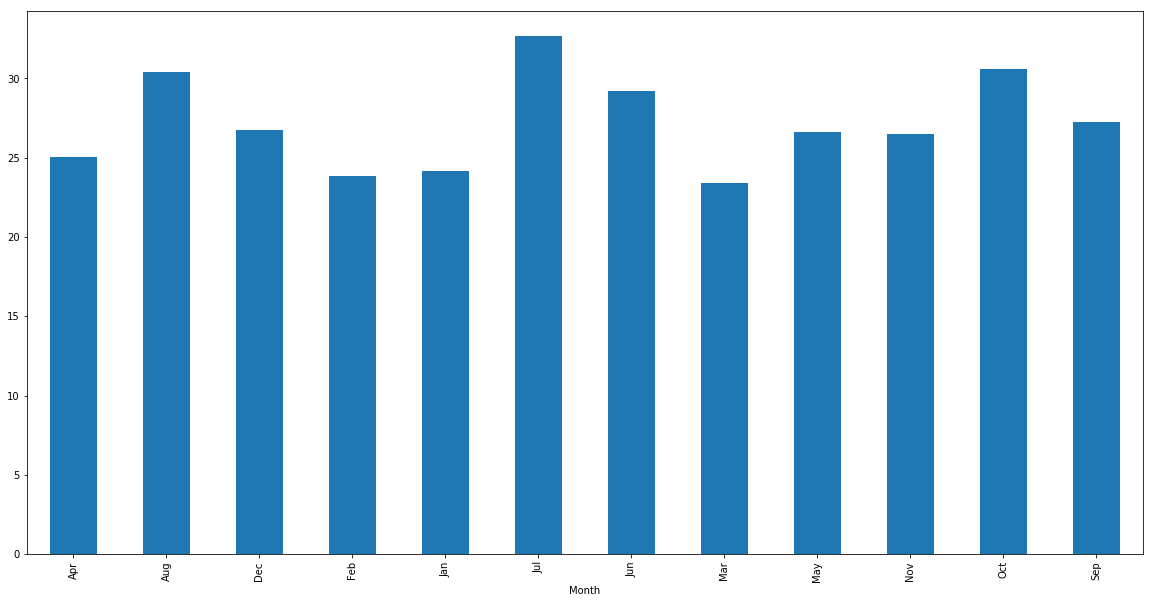

In [25]:
months['std'].plot(kind="bar", figsize = (20,10))

## Similarity to GroupBy<a name="_similarity to groupby"></a>

In [26]:
rain.groupby("Month").aggregate(np.mean)

,Year,Rainfall
Month,,
Apr,1848.5,43.758278
Aug,1848.5,50.973597
Dec,1848.5,46.993399
Feb,1848.5,36.440397
Jan,1848.5,43.052980
Jul,1848.5,55.920530
Jun,1848.5,52.834437
Mar,1848.5,38.354305
May,1848.5,53.817881


## Unpivoting a Pivot table<a name="_unpivoting a pivot table"></a>

Unpivoting this again is a little messy... here's a recipe that flattens it out and then fixes column names. (from http://stackoverflow.com/a/18259530)
You can also try using melt.

In [29]:
pivotedyear.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1688,NaN,9.0,49.0,NaN,NaN,47.0,75.0,NaN,NaN,44.0,46.0,43.0
1689,37.0,41.0,18.0,22.0,36.0,116.0,20.0,22.0,18.0,66.0,50.0,45.0
1690,24.0,79.0,9.0,32.0,70.0,73.0,63.0,43.0,68.0,23.0,64.0,21.0
1691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
unpivoted = pivotedyear.unstack().reset_index()

In [28]:
unpivoted.head()

,Month,Year,0
0,Apr,1688,NaN
1,Apr,1689,37.0
2,Apr,1690,24.0
3,Apr,1691,NaN
4,Apr,1692,NaN


In [57]:
unpivoted.columns

Index(['Month', 'Year', 0], dtype='object')

In [30]:
unpivoted = unpivoted.rename(index=str, columns={0: "Rainfall"})

In [31]:
unpivoted.head()

,Month,Year,Rainfall
0,Apr,1688,NaN
1,Apr,1689,37.0
2,Apr,1690,24.0
3,Apr,1691,NaN
4,Apr,1692,NaN


In [32]:
unpivoted = unpivoted.set_index("Year")
unpivoted.head()

,Month,Rainfall
Year,,
1688,Apr,NaN
1689,Apr,37.0
1690,Apr,24.0
1691,Apr,NaN
1692,Apr,NaN


## Nested Pivoting<a name="_nested pivoting"></a>

In [35]:
stores = pd.read_csv("data_week4/SuperstoreSales.csv", encoding="latin1", parse_dates=["Order Date"])

In [36]:
stores.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/10
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/12
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D¨ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/12
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/11
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/10


In [37]:
segment_region = pd.pivot_table(data=stores, index=["Customer Segment", "Region"], values="Sales", aggfunc=sum)

In [38]:
segment_region

Sales
Customer Segment Region                             
Consumer         Atlantic               6.047924e+05
                 Northwest Territories  6.773285e+04
                 Nunavut                2.725904e+04
                 Ontario                4.818603e+05
                 Prarie                 5.045554e+05
                 Quebec                 3.352536e+05
                 West                   8.378323e+05
                 Yukon                  2.043253e+05
Corporate        Atlantic               6.279933e+05
                 Northwest Territories  3.774939e+05
                 Nunavut                6.097802e+04
                 Ontario                1.112087e+06
                 Prarie                 1.291737e+06
                 Quebec                 4.632017e+05
                 West                   1.224662e+06
                 Yukon                  3.407518e+05
Home Office      Atlantic               4.079473e+05
                 Northwest Territories  1.940070e+05
                 Nunavut                2.294142e+04
                 Ontario                9.419356e+05
                 Prarie                 5.883269e+05
                 Quebec                 4.123416e+05
                 West                   7.390790e+05
                 Yukon                  2.581849e+05
Small Business   Atlantic               3.735153e+05
                 Northwest Territories  1.616135e+05
                 Nunavut                5.198010e+03
                 Ontario                5.273294e+05
                 Prarie                 4.526855e+05
                 Quebec                 2.993982e+05
                 West                   7.959759e+05
                 Yukon                  1.726054e+05